In [1]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#linear regression algoritmasını çağırıyoruz
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
#Ridge,=hatanın karesini alıyor hatayı 0'a çekmeye çalışıyor.
#Lasso=hatanın mutlak değerini alarak hatayı azaltmaya çalışıyor.

from sklearn.model_selection import train_test_split
#train test split veriyi ikiye ayırır biriyle eğitiyor biriyle test eder

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

import warnings #pembe uyarıları kaldırmak için kullanılır
warnings.filterwarnings("ignore")

from sklearn.tree import ExtraTreeRegressor

import numpy as np#matematiksel işlemler için uygun log vs
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv('ParisHousing.csv')

In [4]:
df.sample(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
3336,33612,29,0,0,22,80147,6,1,1995,1,1,5058,4116,182,0,7,3364167.5
2890,22702,10,0,0,49,53757,3,10,1995,1,0,6442,1994,122,1,6,2271827.5
191,59517,38,1,0,69,93928,8,8,2003,1,0,6831,2741,727,1,6,5958698.3
693,9897,83,1,0,55,55819,3,7,1997,0,1,4632,3724,373,1,3,997040.7
9508,83028,65,1,1,71,79082,6,2,2015,0,0,1837,3595,384,0,9,8314727.5
7482,41161,27,0,1,7,82132,4,9,1996,0,1,3694,733,278,1,1,4119394.6
2620,27394,93,1,1,66,19449,1,5,2012,1,0,9345,6623,959,1,7,2754889.2
3182,17389,98,1,0,30,12240,8,1,2008,1,0,1922,9714,387,0,3,1744561.8
6440,74465,22,1,1,85,46001,1,4,1992,0,0,6696,8811,586,0,1,7460896.2
5059,43907,29,0,0,34,44603,10,3,2017,0,1,6877,3185,612,0,3,4392043.7


In [5]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [6]:
df.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [8]:
df.shape

(10000, 17)

In [9]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [10]:
df.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


In [11]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [12]:
abs(df.corr()['price']).sort_values(ascending=False)
#korelasyonu büyükten küçüğe sıralar.
#abs= negatif korelasyonları pozitife çevirmek için mutlak olarak kullanırız.
#(ascending=False) ->Büyükten küçüğe sıralar
#(ascending=True) ->Küçükten Büyüğe sıralar

price                1.000000
squareMeters         0.999999
garage               0.017229
numPrevOwners        0.016619
isNewBuilt           0.010643
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
made                 0.007210
hasYard              0.006119
hasPool              0.005070
basement             0.003967
hasStorageRoom       0.003485
floors               0.001654
cityCode             0.001539
hasGuestRoom         0.000644
attic                0.000600
Name: price, dtype: float64

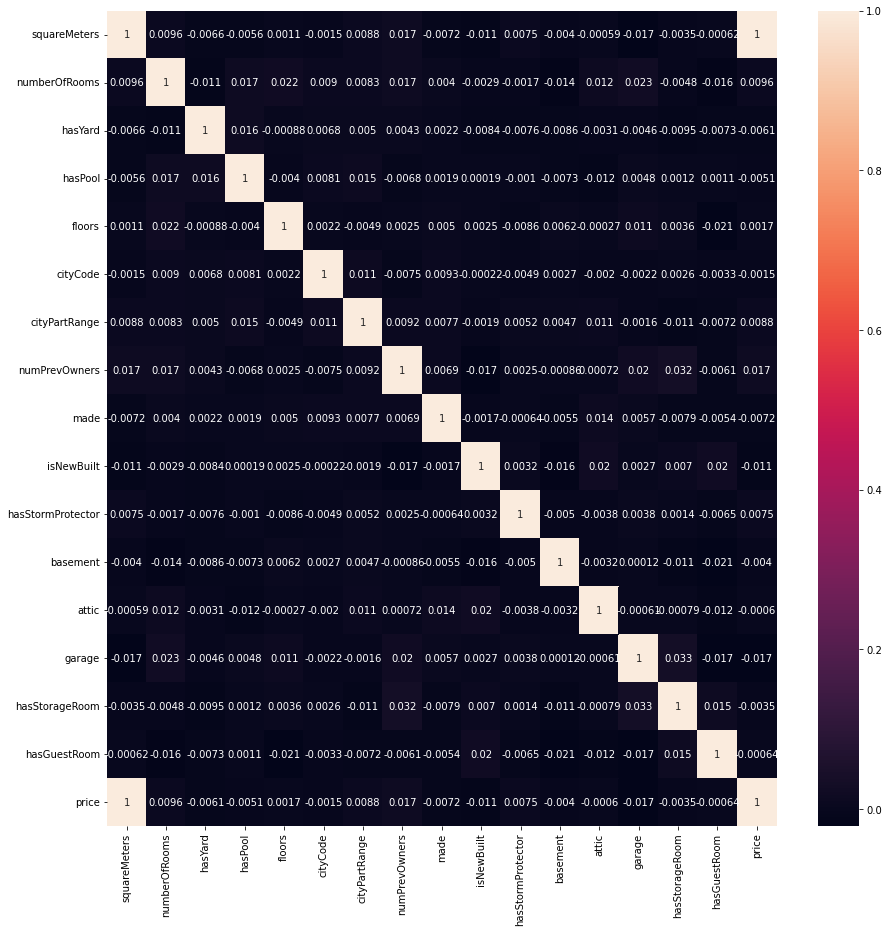

In [13]:
plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), annot=True) #hangi sütunun hangi sütuna nasıl bağlı olduğunu gösterir

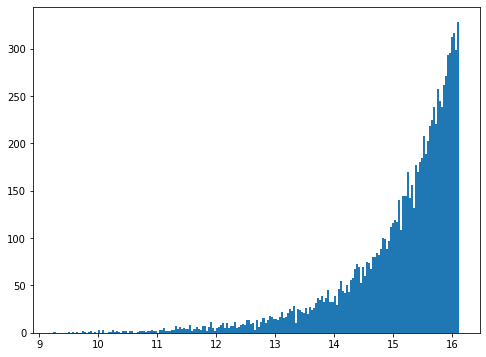

In [14]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.price)), bins=200);

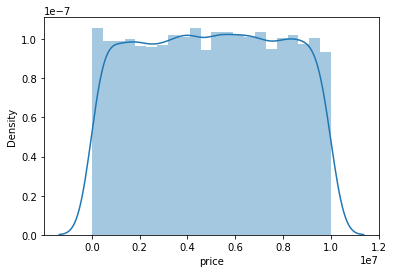

In [15]:
sns.distplot(df.price)

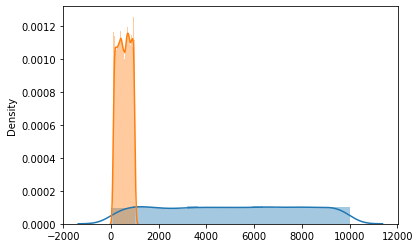

In [16]:
sns.distplot(x=df.attic)
sns.distplot(x=df.garage);	

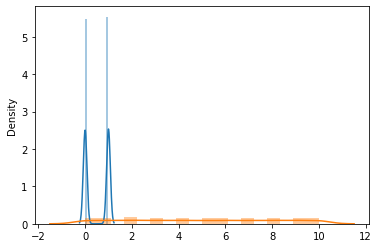

In [17]:
sns.distplot(x=df.hasStorageRoom)
sns.distplot(x=df.hasGuestRoom);			

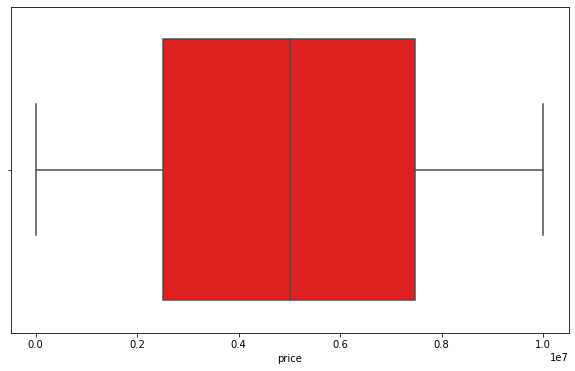

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(df.price,color='red')#boxplot bize outlieer leri gösteriyor çizginin dışındakileri

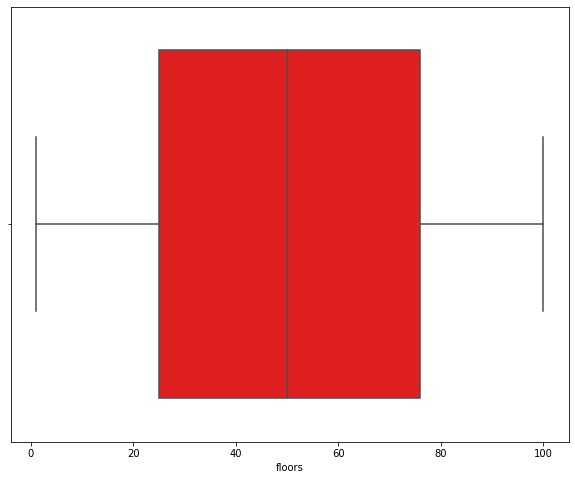

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(df.floors,color='red')

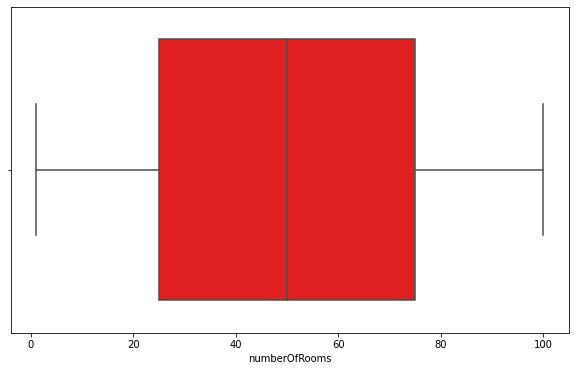

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(df.numberOfRooms,color='red')

In [21]:
df.shape

(10000, 17)

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)  
IQR = Q3 - Q1
print(IQR)

squareMeters           49511.25
numberOfRooms             50.00
hasYard                    1.00
hasPool                    1.00
floors                    51.00
cityCode               50989.50
cityPartRange              5.00
numPrevOwners              5.00
made                      17.00
isNewBuilt                 1.00
hasStormProtector          1.00
basement                4951.50
attic                   5028.50
garage                   449.50
hasStorageRoom             1.00
hasGuestRoom               6.00
price                4952690.50
dtype: float64


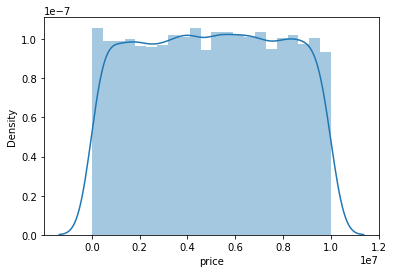

In [23]:
sns.distplot(df.price)

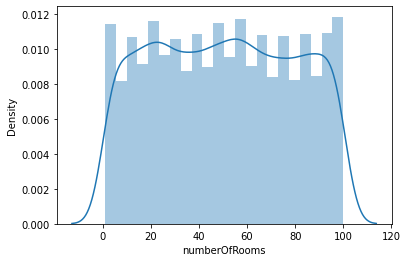

In [24]:
sns.distplot(df.numberOfRooms)

In [25]:
#bir mahallenin bir mahalleye üstünlüğü olmadığı için zipcode'u yazıya çeviriyoruz

In [26]:
df.sample(6)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2683,78000,50,0,0,25,97713,8,5,2000,1,0,6386,9085,978,0,6,7801225.0
5314,81468,19,0,1,39,101,2,5,2009,1,1,7553,1958,184,1,0,8152781.9
8541,86008,47,0,0,82,83780,5,8,2015,0,1,8989,9728,169,1,1,8609323.5
2135,84154,70,0,0,83,24336,4,3,2008,0,1,7318,6920,890,0,6,8419569.8
8220,21818,55,1,1,76,67738,3,4,2011,0,0,5746,3337,220,1,8,2195161.1
2242,84789,50,0,1,27,91548,9,6,1992,0,0,9782,7911,857,0,9,8484814.2


In [39]:
df['age']=2023-df['made']

In [27]:
df.numberOfRooms.mean()

50.3584

In [28]:
df['cityCode']=df['cityCode'].astype('category')#bu veri tipini yazıya çeviriyoruzx

In [29]:
df=df[df['numberOfRooms']<50]

In [32]:
df['squareMeters']=df['squareMeters']**2

In [33]:
df['numberOfRooms']=df['numberOfRooms']**2

In [34]:
df['hasYard']=df['hasYard']**2

In [35]:
df['hasPool']=df['hasPool']**2

In [36]:
df['floors']=df['floors']**2

In [37]:
df['cityPartRange']=df['cityPartRange']**2

In [38]:
df['numPrevOwners']=df['numPrevOwners']**2

In [40]:
df['age']=df['age']**2

In [41]:
df['isNewBuilt']=df['isNewBuilt']**2

In [42]:
df['hasStormProtector']=df['hasStormProtector']**2

In [43]:
df['basement']=df['basement']**2

In [44]:
df['attic']=df['attic']**2

In [45]:
df['garage']=df['garage']**2

In [46]:
df['hasStorageRoom']=df['hasStorageRoom']**2

In [47]:
df['hasGuestRoom']=df['hasGuestRoom']**2

##Modelling

In [48]:
lr=LinearRegression()

In [49]:
x=df.drop(['price'],axis=1)
# modeli kurarken x'in hangi sütunları kapsadığını belirliyoruz.

In [50]:
x.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,age
0,5703723529,9,0,1,3969,9373,9,64,2005,0,1,18601969,81090025,913936,0,49,324
1,6523954441,1521,1,1,9604,39381,64,36,2015,1,0,13344409,5934096,16384,1,4,64
3,1044323856,2209,0,0,36,27939,100,16,2012,0,1,434281,50993881,128881,0,9,121
4,4960244041,361,1,1,8100,38045,9,49,1990,1,0,71149225,5900041,85264,1,16,1089
5,1538443729,1296,0,1,289,39489,64,36,2012,0,1,4036081,20720704,573049,0,1,121


In [51]:
y=df[['price']]

In [52]:
#make ve trim'i yazıdan rakama çevirmek için
x=pd.get_dummies(x,drop_first=True)
#drop_first=True -> Birinci sütunu siler
#get_dummies 0 ve 1 yapar.

In [53]:
x

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,age,cityCode_5,cityCode_11,cityCode_13,cityCode_24,cityCode_34,cityCode_36,cityCode_38,cityCode_54,cityCode_59,cityCode_63,cityCode_94,cityCode_101,cityCode_120,cityCode_123,cityCode_135,cityCode_152,cityCode_154,cityCode_159,cityCode_160,cityCode_170,cityCode_175,cityCode_185,cityCode_187,cityCode_207,cityCode_260,cityCode_267,cityCode_268,cityCode_290,cityCode_294,cityCode_296,cityCode_297,cityCode_308,cityCode_321,cityCode_339,...,cityCode_99374,cityCode_99381,cityCode_99391,cityCode_99400,cityCode_99402,cityCode_99403,cityCode_99408,cityCode_99417,cityCode_99430,cityCode_99433,cityCode_99439,cityCode_99468,cityCode_99478,cityCode_99504,cityCode_99526,cityCode_99543,cityCode_99544,cityCode_99549,cityCode_99552,cityCode_99577,cityCode_99578,cityCode_99585,cityCode_99602,cityCode_99606,cityCode_99609,cityCode_99615,cityCode_99620,cityCode_99623,cityCode_99624,cityCode_99647,cityCode_99648,cityCode_99664,cityCode_99686,cityCode_99714,cityCode_99721,cityCode_99753,cityCode_99760,cityCode_99772,cityCode_99792,cityCode_99795,cityCode_99801,cityCode_99804,cityCode_99838,cityCode_99851,cityCode_99874,cityCode_99898,cityCode_99905,cityCode_99921,cityCode_99940,cityCode_99953
0,5703723529,9,0,1,3969,9,64,2005,0,1,18601969,81090025,913936,0,49,324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6523954441,1521,1,1,9604,64,36,2015,1,0,13344409,5934096,16384,1,4,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1044323856,2209,0,0,36,100,16,2012,0,1,434281,50993881,128881,0,9,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4960244041,361,1,1,8100,9,49,1990,1,0,71149225,5900041,85264,1,16,1089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1538443729,1296,0,1,289,64,36,2012,0,1,4036081,20720704,573049,0,1,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,6125625,2209,1,1,1369,81,4,2012,1,1,9369721,55234624,107584,0,25,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9991,9249245929,144,1,0,1296,49,49,2015,1,1,700569,13808656,318096,0,81,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9994,462852196,25,0,1,121,1,1,1999,0,0,6677056,27730756,619369,0,9,576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,1971626409,841,1,1,144,81,16,1990,0,1,82101721,3034564,52900,0,0,1089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=42)
#data değiştiğii için train_test_split tekrarladık.

In [55]:
model=lr.fit(x_train,y_train) #makineye öğrettik

In [59]:
tahmin=lr.predict(x_test) #test verilerini verip y_test'i tahmin ettirdik.

In [60]:
(mean_squared_error(tahmin,y_test))**.5

841846.115581462

In [61]:
r2_score(tahmin,y_test)

0.9026287952057739

In [62]:
#Regression için başka modellere de bakmanız gerekir.

In [63]:
from sklearn.linear_model import Ridge,Lasso
#Ridge,=hatanın karesini alıyor hatayı 0'a çekmeye çalışıyor.
#Lasso=hatanın mutlak değerini alarak hatayı azaltmaya çalışıyor.

In [64]:
R=Ridge()
L=Lasso()

In [65]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test)

In [66]:
(mean_squared_error(tahmin2,y_test))**.5 #hatayı hesaplıyoruz.

721926.4557027854

In [67]:
r2_score(tahmin2,y_test)

0.9350099285809178

In [68]:
L.fit(x_train,y_train)
tahmin3=L.predict(x_test)

In [69]:
(mean_squared_error(tahmin3,y_test))**.5
#**.5=karesini almak.
# .5 = 0.5
#hata oranını verir.

824792.0887488251

In [70]:
r2_score(tahmin3,y_test)#başarı oranını verir.

0.9062162840430593

In [71]:
#toplam 3 farklı kaynaktan tahmin ettirdik(başaryı doğruladık).

In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
E=ElasticNet(l1_ratio=0.8)

In [74]:
E.fit(x_train,y_train)

ElasticNet(l1_ratio=0.8)

In [75]:
tahmin4=E.predict(x_test)

In [76]:
r2_score(tahmin4,y_test)

0.9337781847014757